In [3]:
# Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [4]:
path = r'C:\Users\iryna\Documents\11.08.2024 Boat Sales Analysis'

In [5]:
boats = pd.read_csv(os.path.join(path,'02 Data','Prepared Data', 'boats.csv'))

In [6]:
boats.head()

,Unnamed: 0,Boat Type,Manufacturer,"Condition, engine type",Year Built,Length,Width,Material,Number of views last 7 days,currency,value,value_in_eur,Country
0,0,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,226,CHF,3337,3337.0,Switzerland
1,1,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,75,EUR,3490,3490.0,Germany
2,2,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,124,CHF,3770,3770.0,Switzerland
3,3,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,64,DKK,25900,3367.0,Denmark
4,4,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,58,EUR,3399,3399.0,Germany


In [7]:
boats.drop(columns = ['Unnamed: 0'], inplace=True)

In [8]:
boats.head()

,Boat Type,Manufacturer,"Condition, engine type",Year Built,Length,Width,Material,Number of views last 7 days,currency,value,value_in_eur,Country
0,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,226,CHF,3337,3337.0,Switzerland
1,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,75,EUR,3490,3490.0,Germany
2,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,124,CHF,3770,3770.0,Switzerland
3,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,64,DKK,25900,3367.0,Denmark
4,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,58,EUR,3399,3399.0,Germany


### Creating a correlation heatmap using seaborn



In [10]:
boats.columns

Index(['Boat Type', 'Manufacturer', 'Condition, engine type', 'Year Built',
       'Length', 'Width', 'Material', 'Number of views last 7 days',
       'currency', 'value', 'value_in_eur', 'Country'],
      dtype='object')

In [11]:
boats.dtypes

Boat Type                       object
Manufacturer                    object
Condition, engine type          object
Year Built                       int64
Length                         float64
Width                          float64
Material                        object
Number of views last 7 days      int64
currency                        object
value                            int64
value_in_eur                   float64
Country                         object
dtype: object

In [12]:
# Creating a subset excluding the 'Boat Type', 'Manufacturer', 'Condition, engine type', 'Material' , 'currency', 'value' , 'Country' columns

sub1 = boats[['Year Built', 'Length', 'Width', 'Number of views last 7 days', 'value_in_eur']]

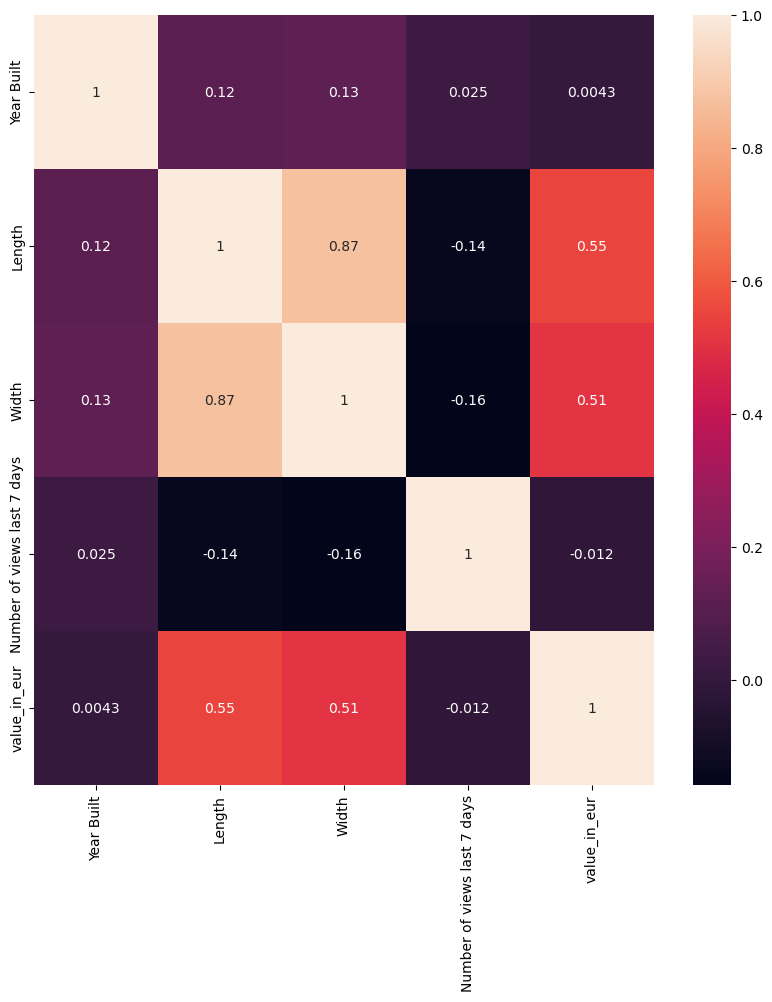

In [13]:
# Creating a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Creating the Correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub1.corr(), annot = True, ax = ax) 

# Coefficients meaning in terms of the relationships between the variables.


#### value_in_eur/Length - (0.55) coefficient indicates a medium-to-strong positive correlation. 
#### "The longer (bigger) the boat, the more expensive it is"


#### value_in_eur/Width -  (0.51) coefficient indicates a medium-to-strong positive correlation. 
#### "The wider (bigger) the boat, the more expensive it is"

## As for the question: Is it the most expensive boats that get the most views?


#### value_in_eur/Number of views last 7 days - (-0,012) a weak negative correlation. 
#### "The lower the price, the more number of views” and vice versa — ”The higher the price, the less the number of views”


## As for the question: Are there common features among the most viewed boats?


#### Number of views last 7 days/Length - (-0,014) a weak negative correlation. 
#### "The shorter the length, the bigger the number of views” and vice versa — ”The bigger the length, the smaller the number of views”

#### Number of views last 7 days/Width - (-0,016) a weak negative correlation. 
#### This could be interpreted as “The smaller the Width, the bigger the number of views” and vice versa — ”The bigger the Width, the smaller the number of views”


#### Number of views last 7 days/Year Built - (0,025) coefficient indicates a weak relationships, positive correlation. 
#### "The higher the year of built (the newer the boat) the more views it gets"


#### Length/Width - (0.87) coefficient indicates a medium-to-strong positive correlation. 
#### "The longer the boat, the wider it is."


### Creating Scatterplots for the variables with the strongest correlations.

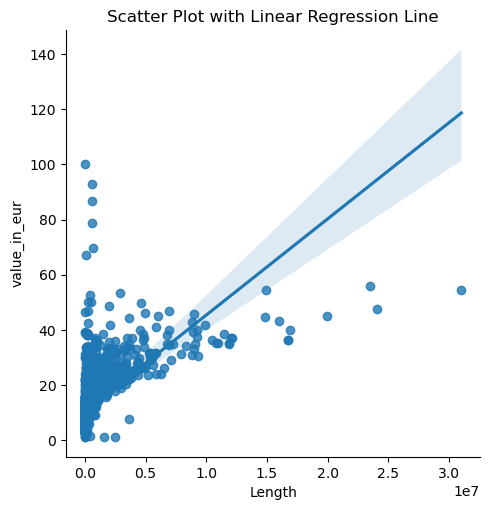

In [16]:
# Creating a scatterplot for the "value_in_eur" and "Length" columns in seaborn

sns.lmplot(x = 'value_in_eur', y = 'Length', data = boats)
plt.xlabel('Length')
plt.ylabel('value_in_eur')
plt.title('Scatter Plot with Linear Regression Line')
plt.show()

#### The trend line is at a large angle of inclination, which shows a strong correlation. The data points are close to the trend line at small values ​​of the variables.The strength of the correlation "The longer the boat, the more expensive it is" is the greatest around smaller values. We also see outliers with 'length' up to 100 and 'value_in_eur' around 0.

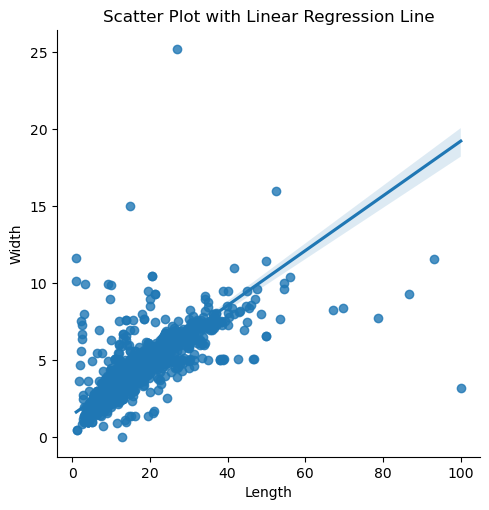

In [18]:
# Creating a scatterplot for the "Length" and "Width" columns in seaborn

sns.lmplot(x = 'Length', y = 'Width', data = boats)
plt.xlabel('Length')
plt.ylabel('Width')
plt.title('Scatter Plot with Linear Regression Line')
plt.show()

#### The trend line is at a large angle of inclination, which shows a strong correlation. The data points are close to the trend line but we can also see a small scatter of these points. Also can see outliers with 'length' up to 100 and 'Width' less than 5 and Length 20-40 and Width around 25.

### Creating a pair plot of the entire data set.

In [21]:
sub2 = boats[['Manufacturer', 'Condition, engine type', 'Year Built', 'Length', 'Width', 'Material', 'Number of views last 7 days', 'value_in_eur', 'Country']]

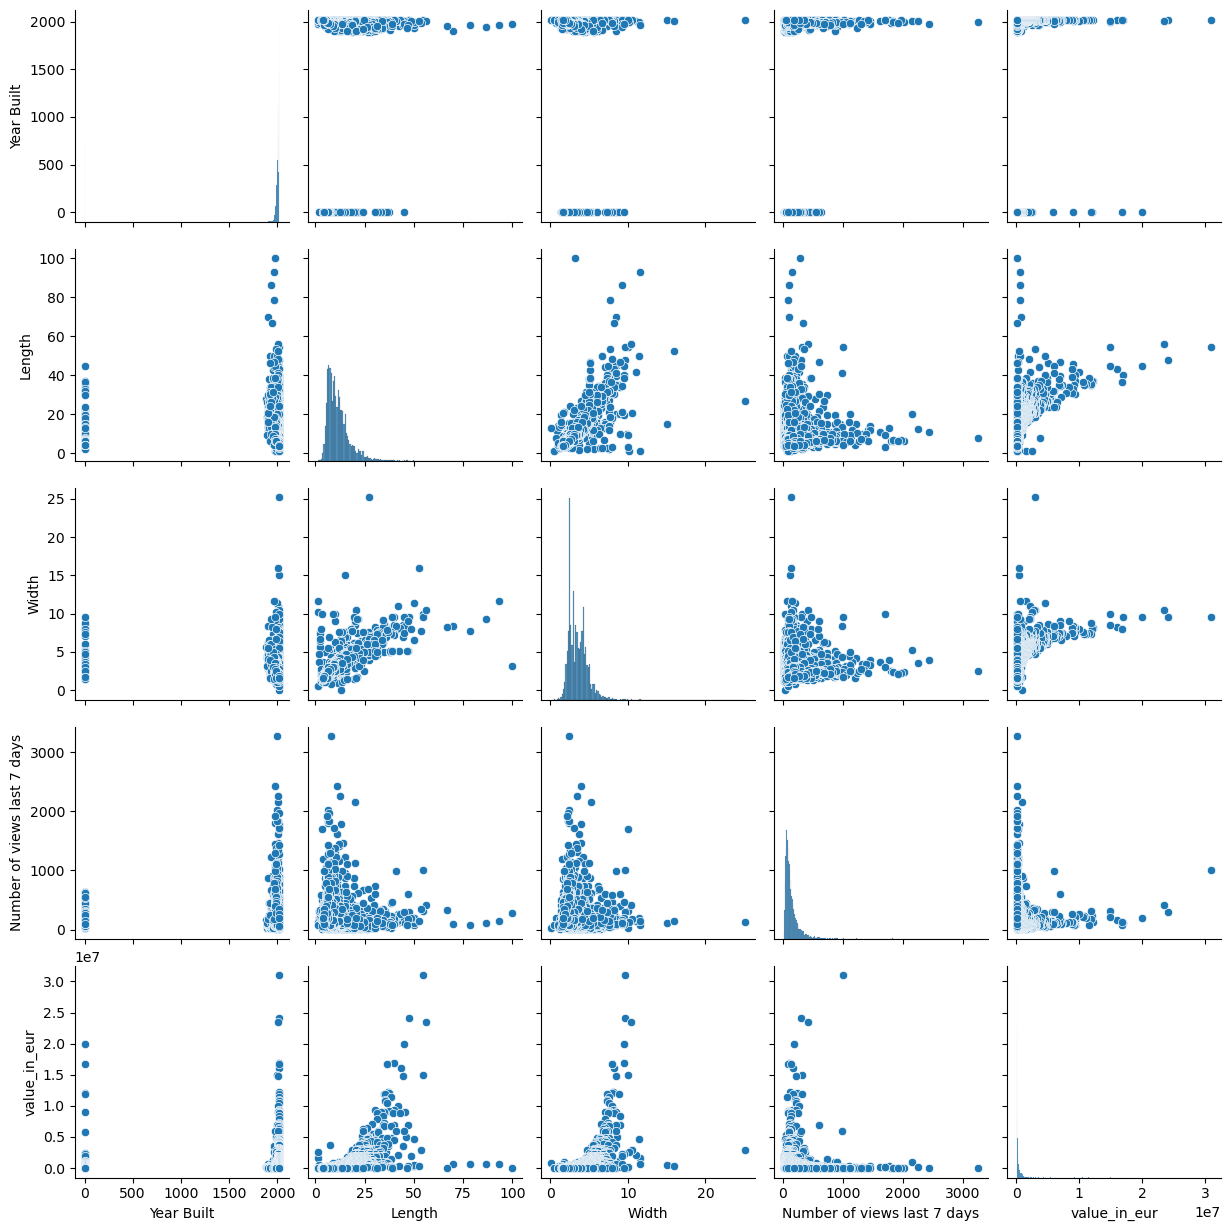

In [22]:
# Create a pair plot 

gplot = sns.pairplot(sub2)

### The pair plot shows that the analysis of the correlation heatmap is correct and corresponds to it. Graphs with the 'Year Built' have a cluster of points near the indicator 0, because there are 0 values ​​in the data.

## Categorical Plots

<Axes: xlabel='value_in_eur', ylabel='Count'>

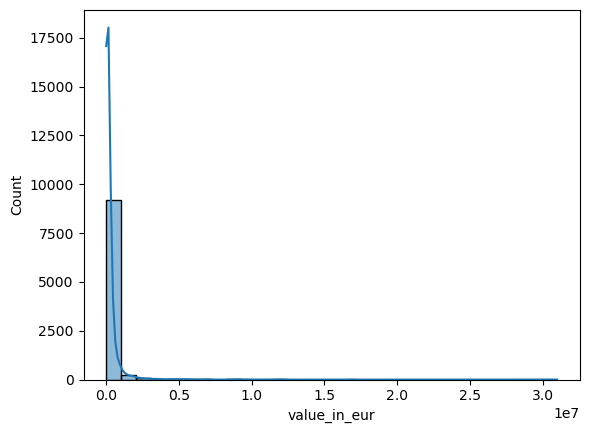

In [25]:
# Creating a categorical variable that splits the "Value_in_eur" column into categories
# The argument "kde" add a line that encompasses the distribution

sns.histplot(boats['value_in_eur'], bins =30, kde = True)


In [26]:
boats['value_in_eur'].value_counts()

value_in_eur
65000.0      80
45000.0      74
35000.0      69
89000.0      67
75000.0      67
             ..
1339000.0     1
1349000.0     1
1369000.0     1
1371535.0     1
3780.0        1
Name: count, Length: 2570, dtype: int64

In [27]:
boats['value_in_eur'].min()

3224.0

In [28]:
boats['value_in_eur'].max()

31000000.0

In [29]:
boats.loc[boats['value_in_eur'] < 1000000, 'Price category'] = 'Low price'

In [30]:
boats.loc[(boats['value_in_eur'] >= 1000000) & (boats['value_in_eur'] <2000000), 'Price category'] = 'Middle price'

In [31]:
boats.loc[boats['value_in_eur'] > 2000000, 'Price category'] = 'High price'

In [32]:
boats['Price category'].value_counts(dropna = False)

Price category
Low price       9165
NaN              302
Middle price     248
High price       173
Name: count, dtype: int64

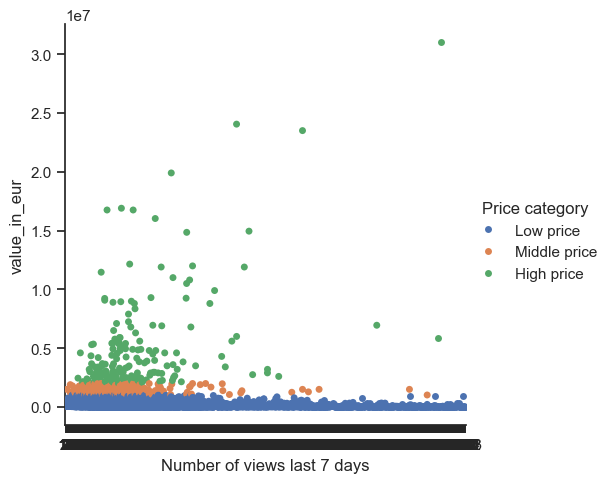

In [33]:
# Creating a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")
g2 = sns.catplot(x="Number of views last 7 days", y="value_in_eur", hue="Price category", data=boats)

##### This graph confirms that the higher the price, the less it receives views from customers.

## Hypothesis: 
### The higher the price of the boat, the less it receives views from customers


In [36]:
#current dir
cwd = os.getcwd()
cwd

'C:\\Users\\iryna\\Documents\\11.08.2024 Boat Sales Analysis\\03 Scripts'

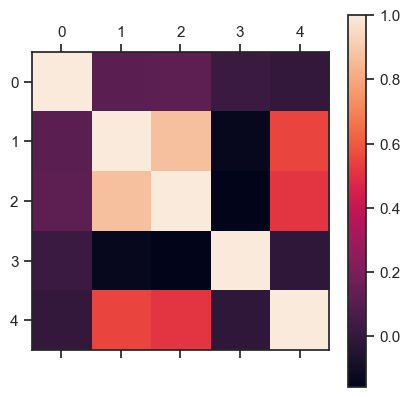

In [37]:
# Save figure
plt.matshow(sub1.corr())
plt.colorbar() 
plt.savefig("Heatmap.png") 
plt.show()

In [38]:
# Saving Categorical Plot

g2.savefig("cutplotValueViews.png")

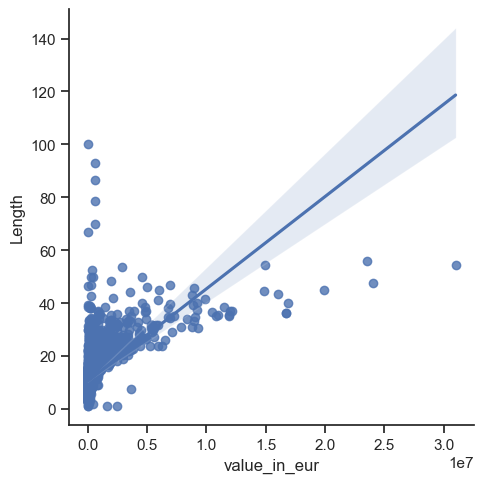

In [39]:
# Saving scatterplot 1

scatplot1=sns.lmplot(x = 'value_in_eur', y = 'Length', data = boats)

scatplot1.savefig('my_scatplot1.png')

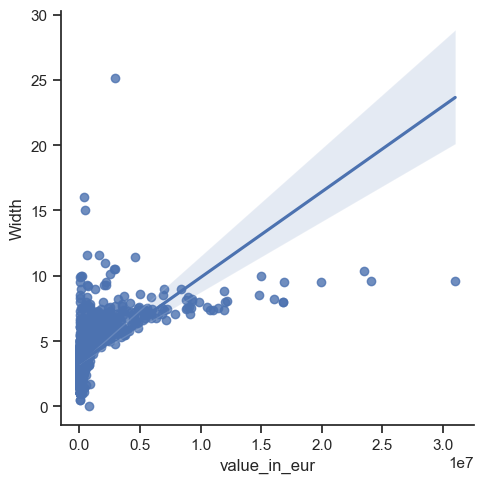

In [40]:
# Saving scatterplot 2
scatplot2=sns.lmplot(x = 'value_in_eur', y = 'Width', data = boats)

scatplot2.savefig('my_scatplot2.png')

In [41]:
# Saving pair plot
gplot.savefig('pairplot.png')

In [42]:
# Exporting dataframe

boats.to_csv(os.path.join(path, '02 Data','Prepared Data', 'boats6.2.csv'))